<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/M%C3%A9todo_de_Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SOLUCIÓN DE LA ECUACIÓN DE CALOR UTILIZANDO EL MÉTODO DE DIFERENCIAS REGRESIVAS (MÉTODO ÍMPLICITO DE RICHARDSON)**


\
$$\
\frac{\partial u}{\partial t}(x,t)
-
\frac{\partial^2 u}{\partial x^2}(x,t)
=0,
\qquad 0<x<1,\; t>0
$$

**Sujeta a las restricciones:**


$$
u(0,t)=0,\qquad u(1,t)=0,\qquad t>0
$$
$$
u(x,0)=\sin(\pi x),\qquad 0\le x\le 1
$$

**Para resolver el sistema por el método implícito utilizaremos la siguiente expresión:**
$$
\begin{aligned}
(1 + 2\lambda)\, U_{i,j}
\;-\;
\lambda\, U_{i+1,j}
\;-\;
\lambda\, U_{i-1,j}
&= U_{i,j-1}, \\
\text{para } i &= 1,2,3,\ldots,n-1, \\
j &= 1,2,3,\ldots
\end{aligned}
$$


**La solución analítica es:**
$$
u(x,t)=e^{-\pi^2 t}\,\sin(\pi x)
$$

In [1]:
import sympy as sp # libreria que permite trabajar con matemáticas simbólicas
import numpy as np # ibrería principal para cálculo numérico en Python

import matplotlib.pyplot as plt # Pyplot es un módulo de Matplotlib que sirve para graficar datos.
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap para mapas de colores

In [2]:
def f(x):
    return np.sin(np.pi*x) # representa una función de frontera o condición inicial con lo que se estará trabajando

**Ejercicio 1:**  Codificar la matriz A de manera más simple.

In [3]:

n = 9 # Define el tamaño de la matriz (9x9)

# La Matriz A: es una tridiagonal con 3 en la diagonal principal y -1 en subdiagonal y superdiagonal
A = 3*sp.eye(n)  # coloca 3 en la diagonal principal

for i in range(n-1):
    A[i, i+1] = -1  # representa la superdiagonal
    A[i+1, i] = -1  # representa la subdiagonal
    ### En cada iteración haces dos cosas: 1)A[i, i+1] = -1, esto pone -1 en la superdiagonal (arriba de la diagonal principal).
    ## 2) A[i+1, i] = -1 Esto pone -1 en la subdiagonal (debajo de la diagonal principal).


In [4]:
A # permite ver la matriz

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

**Ejercicio 2:** Definir las entradas de b de manera más simple (quizás con un bucle).

In [8]:
# Construcción del vector b
h = 0.1 # Representa el tamaño de paso en una malla de puntos en el intervalo [0,1]
b = sp.Matrix([f(h*i) for i in range(1, n+1)])  # f(0.1), f(0.2), ..., f(0.9), comprensión de listas para generar b

In [9]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [10]:
A.LUsolve(b) # Resuelve el sistema lineal Ax=b, usando descomposición LU, te da el vector x con la solución.

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [11]:
#A: Matriz, b: vector de términos independientes y j: número de pasos en el tiempo
def richardson(A, b, j): # Se define la función que calcula el método con sus respectivos parámetros,
    S = [] # Lista donde se almacena cada vector producido
    b_1 = b.copy() # se copia  el vector b, es decir,este será tu vector que se irá transformando

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila, Convierte el vector de SymPy a un arreglo NumPy con flotantes y por otro lado, Lo convierte en vector fila, no en columna
        sol = A.LUsolve(b_1) # Resuelves un sistema Ax = b_1
        b_1 = sol # Actualiza el vector para la siguiente iteración

    return np.array(S)   # matriz resultado, se regresa una matriz con todas las iteraciones

**Ejercicio 4:** Graficar para un valor particular de t = 0.5 y comparar contra la gráfica de la solución exacta:
$$
u(x,t)=e^{-\pi^2 t}\,\sin(\pi x)
$$

Máximo error en t = 0.5: 0.002186295507492905


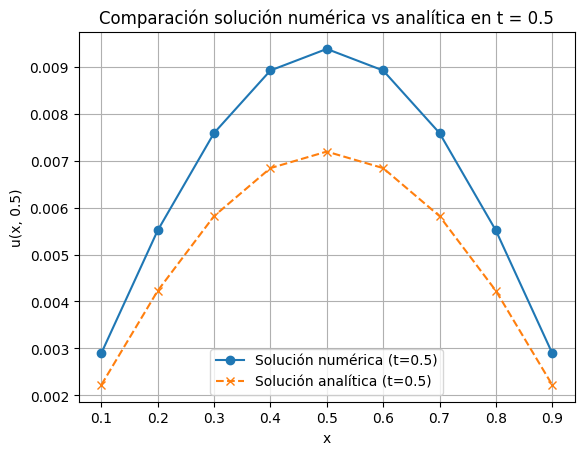

In [12]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

##Definicion del problema para sacar la gráfica comprarativa##

def f(x):
    return np.sin(np.pi * x)

# Considerando los Parámetros de malla##
n = 9           # puntos interiores
h = 0.1         # tamaño de paso en x (0, 0.1, ..., 1)
k = 0.01        # paso de tiempo
t_final = 0.5   # tiempo al que queremos llegar
n_steps = int(t_final / k)

##Matriz A (implícito Euler atrás)##

A = 3 * sp.eye(n)  # diagonal principal

for i in range(n-1):
    A[i, i+1] = -1  # superdiagonal
    A[i+1, i] = -1  # subdiagonal

###Vector inicial u(x,0) en los puntos interiores##

x_int = np.array([h*i for i in range(1, n+1)])   # 0.1, 0.2, ..., 0.9
u0_vals = [f(x) for x in x_int]                  # sin(pi x_i)
u_n = sp.Matrix(u0_vals)                         # vector columna simbólico

###Avance en el tiempo hasta t = 0.5##

for _ in range(n_steps):
    u_n = A.LUsolve(u_n)     # resuelve A u^{n+1} = u^n

# Conversión de la solución numérica a numpy para graficar#
u_num = np.array(u_n, dtype=float).reshape(-1)

###Solución analítica en t = 0.5 en los mismos puntos interiores##

u_exact = np.exp(-np.pi**2 * t_final) * np.sin(np.pi * x_int)

# Cálculo del error##

error = np.abs(u_num - u_exact)
print("Máximo error en t = 0.5:", error.max())

###Gráfica de comparación###

plt.figure()
plt.plot(x_int, u_num, marker='o', linestyle='-', label='Solución numérica (t=0.5)')
plt.plot(x_int, u_exact, marker='x', linestyle='--', label='Solución analítica (t=0.5)')
plt.xlabel('x')
plt.ylabel('u(x, 0.5)')
plt.title('Comparación solución numérica vs analítica en t = 0.5')
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio 5:**¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?


Si están pidiendo específicamente que implementes el método numérico con h = 0.1 →
entonces sí, implica usar el sistema 9×9

o único que podrías hacer para tener algo más chico es:

usar menos puntos (por ejemplo
ℎ=0.25
h=0.25 → 3 puntos interiores → matriz 3×3), pero eso ya es otro discretizado, con menos precisión.

In [13]:
j = 20 # Número de pasos en el tiempo

In [14]:
U=richardson(A, b, j)

In [15]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

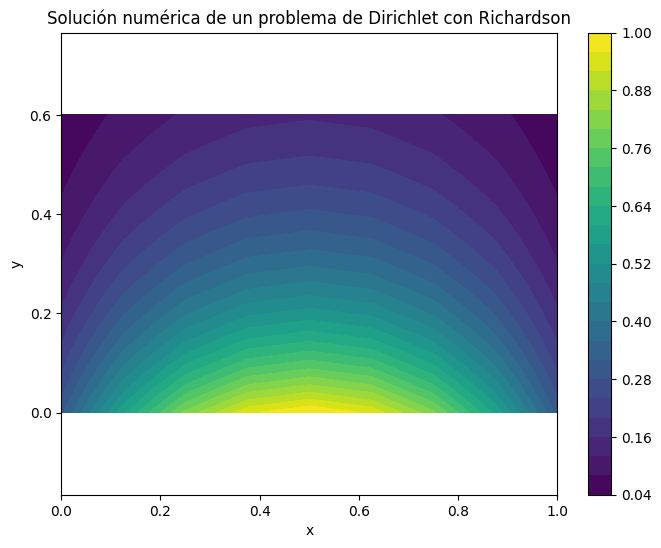

In [18]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet con Richardson')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

**Explicar la gráfica:** La gráfica es la solución numérica de un problema de Dirichlet para una ecuación de calor en estado estacionario:
con condiciones de frontera en el contorno.


La diferencia entre curvas es el resultado de:

discretización en malla,

interpolación bilineal entre valores nodales,

suavizado de la ecuación de Laplace.

Cada "franja" de color corresponde a un nivel de la solución numérica.


La gráfica muestra:
•	Una solución numérica 2D a un problema de Dirichlet.
•	Los colores indican la magnitud de la solución u(x,y)u(x,y)u(x,y).
•	El valor máximo está en el centro inferior del dominio.
•	La solución disminuye hacia los bordes, cumpliendo u=0u=0u=0.
•	Refleja un estado estacionario armónico, típico en fenómenos de difusión o temperatura.




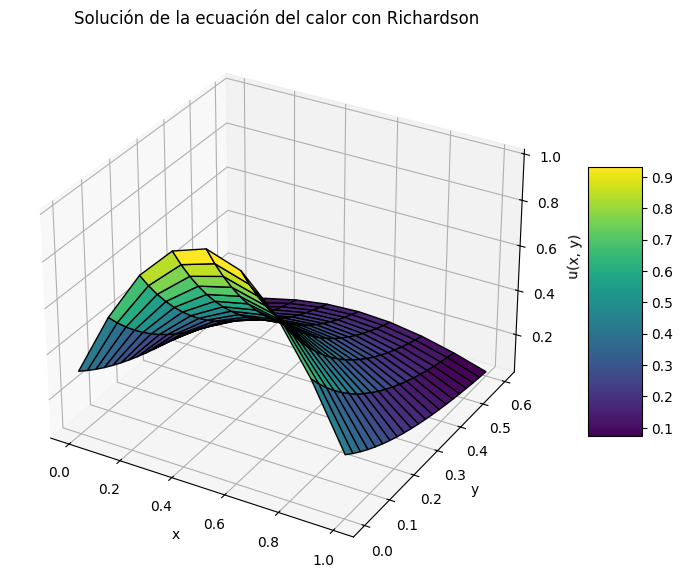

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Richardson ')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Explicar la gráfica:**

 la gráfica representa cómo la temperatura se distribuye y evoluciona hacia un estado estacionario al resolver numéricamente la ecuación del calor mediante el método de Richardson.



**Ejercicio 6:** Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?
El detalle de precisión se debe a que la malla utilizada tiene muy pocos puntos en la dirección y.

Esto genera superficies y curvas de nivel poco suaves, con franjas visibles y cambios bruscos entre nodos.
Al aumentar la resolución de la malla en y, las gráficas se vuelven más precisas y representan mejor la solución continua.